## 1. Importing Relevant Libraries

In [2]:
# Import commonly used libraries
import pandas as pd
import os
import sys
from pathlib import Path

# Import necessary modules from the GWRExplain package
from GWRExplain.utils.search_neighbors import get_neighbors
from GWRExplain.core.GWRExplain import GWRExplain
from GWRExplain.visualization.map_plot import gwr_shap_summary_plot, gwr_shap_local_plot

## 2. Data Loading and Display

In [3]:
# Import the dataset
# Note: The dataset path is relative to the project root directory
current_dir = os.getcwd() # Get the current working directory
current_dir = os.path.abspath(os.path.join(current_dir, '..', '..')) # Get the absolute path of the project root directory
relative_path = os.path.join(current_dir, 'dataset', 'california_housing.csv') # Construct the relative path to the dataset
# Read the dataset into a pandas DataFrame
data = pd.read_csv(relative_path)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Extract latitude and longitude information
coords = data[['Latitude', 'Longitude']]
coords.head()

,Latitude,Longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25


In [5]:
# Extract features and target variable
# Select the relevant features and target variable from the dataset
X = data[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']]
y = data[['MedHouseVal']]

In [6]:
# Standardize the features to have mean 0 and standard deviation 1
X = (X - X.mean(axis=0)) / X.std(axis=0)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344709,0.982119,0.628544,-0.153754,-0.974405,-0.049595
1,2.332181,-0.607004,0.327033,-0.263329,0.861418,-0.092510
2,1.782656,1.856137,1.155592,-0.049015,-0.820757,-0.025842
3,0.932945,1.856137,0.156962,-0.049832,-0.766010,-0.050328
4,-0.012881,1.856137,0.344702,-0.032905,-0.759828,-0.085614


In [7]:
# Standardize the target
# The target variable is also standardized to have mean 0 and standard deviation 1
y = (y - y.mean(axis=0)) / y.std(axis=0)
y.head()

,MedHouseVal
0,2.129580
1,1.314124
2,1.258663
3,1.165072
4,1.172871


## 3. Calculate the neighborhood nodes for each data point

In [8]:
# Calculate the neighbors for each data point based on coordinates
# Here, an adaptive neighbor search method is used, setting the number of neighbors to 10 and using spherical distance calculation
distances, indices = get_neighbors(coords, 
                        n_neighbors=10, 
                        mode='adaptive',
                        spherical=True
                        )

In [9]:
distances # Display the distances of the neighbors

array([[ 0.        ,  0.87765985,  2.07777766, ...,  2.07797899,
         2.07797899,  2.3908619 ],
       [ 0.        ,  1.11194927,  1.41677127, ...,  2.07838153,
         2.22389853,  2.22389853],
       [ 0.        ,  0.        ,  0.        , ...,  0.87801721,
         1.11194927,  1.11194927],
       ...,
       [ 0.        ,  6.72670394,  6.88946286, ..., 15.42398424,
        15.63794182, 17.63620107],
       [ 0.        ,  7.47990238,  8.58870819, ..., 12.9112844 ,
        13.07367609, 14.50316569],
       [ 0.        ,  6.88946286,  9.57926618, ..., 13.27597446,
        13.58988645, 13.78003112]], shape=(20640, 10))

In [10]:
indices # Display the indices of the neighbors

array([[    0,  1633,   418, ...,   458,   457,   493],
       [    1,   125,   122, ...,   494,   126,  1633],
       [  121,   494,     2, ...,     4,   123,   493],
       ...,
       [20637, 20636, 20639, ..., 10065,  1148, 10064],
       [20638,  1191, 20637, ...,  1155, 20631,  1156],
       [20639, 20637, 20638, ..., 10013, 20636, 10015]], shape=(20640, 10))

## 4. Loading Weight Coefficients

In [11]:
# Read parameters from the GWR model parameter file
coefficients = pd.read_csv(r'paras_78.0.csv')
coefficients.head()

,intercept,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,6.784547,0.056256,-0.000915,0.045685,-3.390927,-0.000472,0.191806
1,3.960891,-0.018593,-0.002329,0.273499,-2.680006,-0.000182,0.485403
2,-0.237915,0.301554,0.006267,0.019050,0.387978,0.000104,0.511812
3,0.310309,0.538346,-0.005156,-0.187727,0.788696,0.000273,0.277283
4,0.310309,0.538346,-0.005156,-0.187727,0.788696,0.000273,0.277283


## 5. Calculate SHAP_VALUE

In [12]:
# Load the GWRExplain class
gwrExplain = GWRExplain()

# Use the explain method of the GWRExplain class for explanation
# Here, the interventional feature perturbation method is used
gwrExplain.explain(X, y, coefficients, indices, feature_perturbation='interventional')

In [13]:
# Save the explanation results to a CSV file
gwrExplain.shap_values.to_csv('house_price_shap_values.csv', index=False)
gwrExplain.shap_values.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,0.101611,0.000073,0.027266,-0.014260,0.000243,-0.009057
1,-0.015916,0.003811,-0.073111,0.252941,-0.000226,-0.011684
2,-0.192201,-0.006722,0.002370,0.078063,-0.000057,-0.016183
3,0.484356,-0.000696,-0.013961,0.008629,-0.000047,0.006591
4,0.484356,-0.000696,-0.013961,0.008629,-0.000047,0.006591


## 6. Visualizing Explanation Results

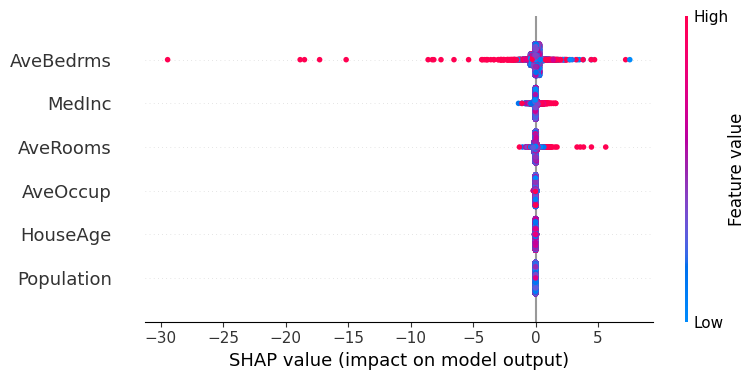

In [14]:
# Plot the global SHAP values dot plot
# Here, the gwr_shap_summary_plot function from the GWRExplain library is used
gwr_shap_summary_plot(gwrExplain.shap_values, X, plot_type="dot")

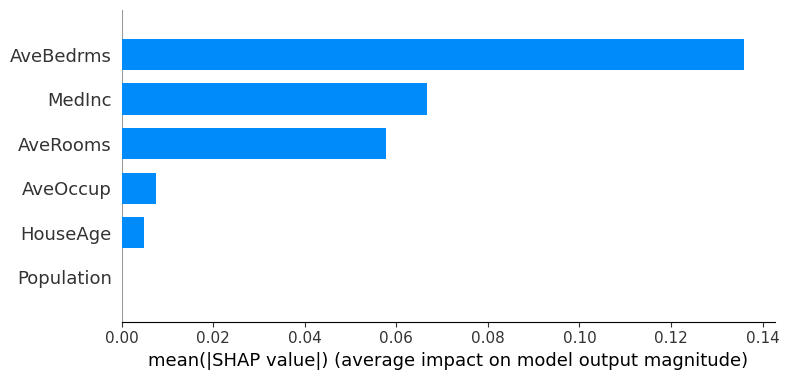

In [15]:
# Plot the global SHAP values bar chart
gwr_shap_summary_plot(gwrExplain.shap_values, X, plot_type="bar")

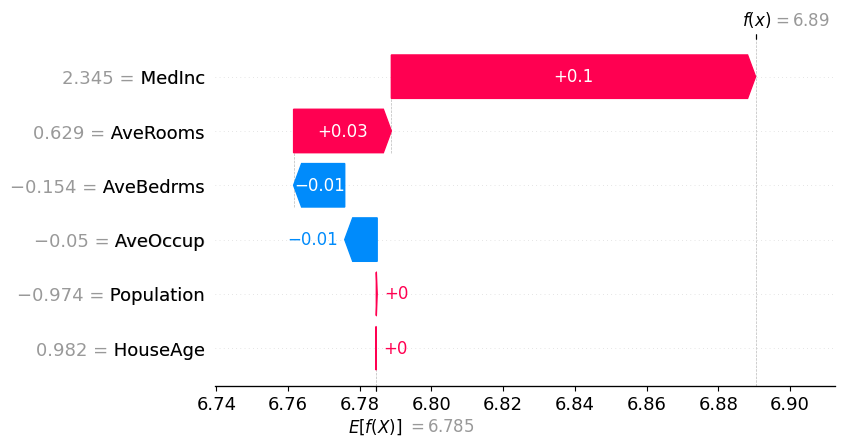

In [16]:
# Plot the local sample waterfall chart
# Here, the gwr_shap_local_plot function from the GWRExplain library is used
gwr_shap_local_plot(gwrExplain.shap_values, X, coefficients, feature_names=None, sample_index=0)